In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
ames = pd.read_csv("train.csv")

In [6]:
df = ames[['GarageType', "GarageCars","GarageCond","PavedDrive", "WoodDeckSF", "OpenPorchSF","EnclosedPorch","ScreenPorch", "YrSold", "SaleType", "SaleCondition", "SalePrice", 'LotArea']]

In [257]:
# GarageType - Garage or no Garage
# GarageCars
# GarageCond - further investigate
# PavedDrive - dummify them
# OpenPorchSF +
# EnclosedPorch + 
# ScreenPorch +
# YrSold
# SaleCondition Investigate Subgroups
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [8]:
df.loc[:,('YrSold')] = list(int(str, df['GarageType']))

TypeError: 'Series' object cannot be interpreted as an integer

In [366]:
#GarageType - Garage or no Garage 
df.loc[:,('GarageType')] = list(map(str, df['GarageType']))
replacements = {"nan": 'N',
                'Attchd': 'Y',
                'Detchd': 'Y',
                 'BuiltIn': 'Y',
                'CarPort': 'Y',
                'Basment': 'Y',
                '2Types': 'Y'}
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
df.loc[:,('GarageType')]= [replace_all(l, replacements) for l in df['GarageType']]

In [367]:
#GarageType - Garage or no Garage  part 2
df['GarageType'] = [0 if x == 'N' else 1 for x in df.GarageType]
df['GarageType'].value_counts()

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    1379
0      81
Name: GarageType, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027733A32D88>,
      dtype=object)

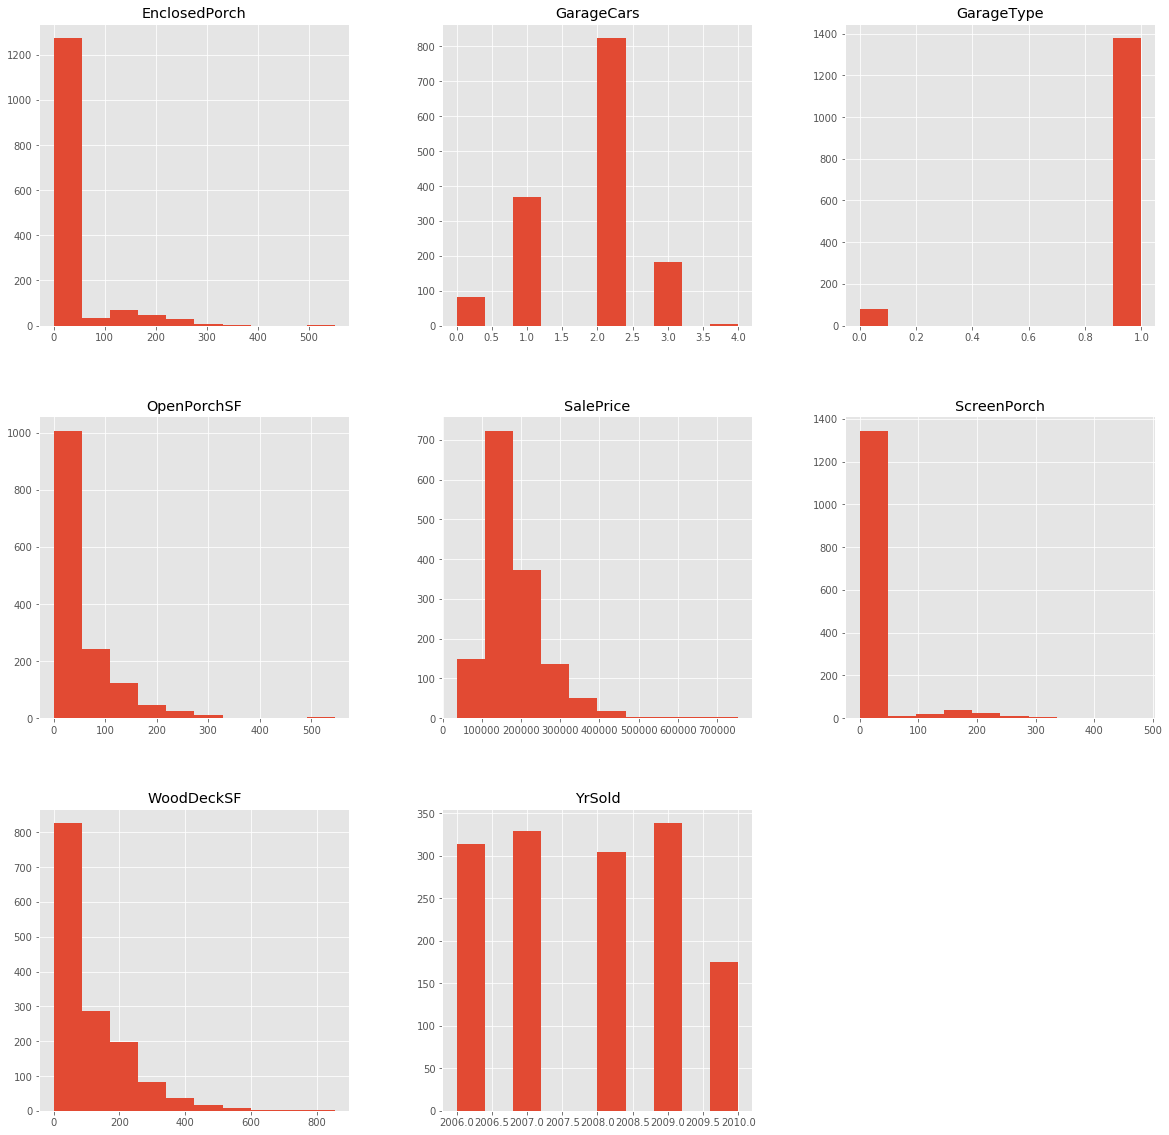

In [368]:
df.hist(figsize = (20, 20))

In [369]:
df.describe()

,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.944521,1.767123,94.244521,46.660274,21.954110,15.060959,2007.815753,180921.195890
std,0.228992,0.747315,125.338794,66.256028,61.119149,55.757415,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,1.000000,2.000000,0.000000,25.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,2009.000000,214000.000000
max,1.000000,4.000000,857.000000,547.000000,552.000000,480.000000,2010.000000,755000.000000


In [370]:
#Garagecars
df["GarageCars"].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [371]:
# GarageCond - Changed NA to 'No Garage' then changed to binary
df.loc[:,("GarageCond")] = df["GarageCond"].fillna("No Garage")
df['GarageCond'] = [0 if x == 'No Garage' else 1 for x in df.GarageCond]
df['GarageCond'].value_counts()

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    1379
0      81
Name: GarageCond, dtype: int64

(array([  81.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1379.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

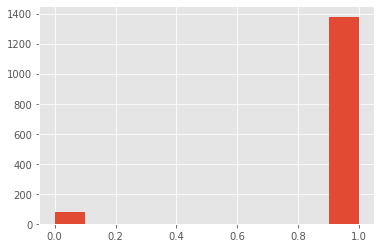

In [372]:
from matplotlib import pyplot as plt
plt.hist(df['GarageCond'])

<BarContainer object of 1460 artists>

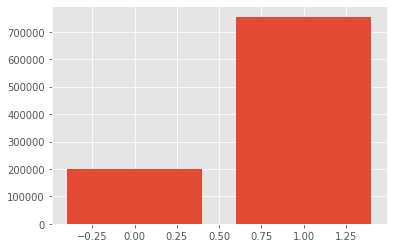

In [373]:
plt.bar(df['GarageCond'], df['SalePrice'])

In [375]:
#Dummify PavedDrive - converted to binary
df['PavedDrive'] = [0 if x == 'N' else 1 for x in df.PavedDrive]
df['PavedDrive'].unique()

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0], dtype=int64)

(array([  90.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1370.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

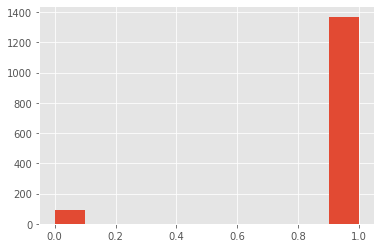

In [376]:
plt.hist(df['PavedDrive'])

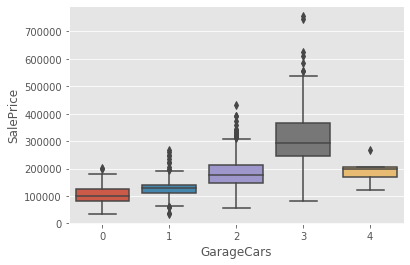

In [329]:
#Distribution of Garage Cars Capacity vs. Sale Price 
import seaborn as sns
sns.boxplot(df['GarageCars'], df['SalePrice'])

In [330]:
#Sum: OpenPorchSF + EnclosedPorch + ScreenPorch
total_sum= df["OpenPorchSF"]+ df["EnclosedPorch"] + df["ScreenPorch"]
df['Total.Porch'] = total_sum
df['Total.Porch']


C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        61
1         0
2        42
3       307
4        84
       ... 
1455     40
1456      0
1457     60
1458    112
1459     68
Name: Total.Porch, Length: 1460, dtype: int64

In [381]:
#Binary of each OpenPorchSF , EnclosedPorch , ScreenPorch in separate new columns
df['New.OpenPorchSF'] = [0 if x == 0 else 1 for x in df.OpenPorchSF]
df['New.EnclosedPorch'] = [0 if x == 0 else 1 for x in df.EnclosedPorch]
df['New.ScreenPorch'] = [0 if x == 0 else 1 for x in df.ScreenPorch]
df

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,GarageType,GarageCars,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,SaleType,SaleCondition,SalePrice,New.OpenPorchSF,New.EnclosedPorch,New.ScreenPorch
0,1,2,1,1,0,61,0,0,2008,WD,Normal,208500,1,0,0
1,1,2,1,1,298,0,0,0,2007,WD,Normal,181500,0,0,0
2,1,2,1,1,0,42,0,0,2008,WD,Normal,223500,1,0,0
3,1,3,1,1,0,35,272,0,2006,WD,Abnorml,140000,1,1,0
4,1,3,1,1,192,84,0,0,2008,WD,Normal,250000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,2,1,1,0,40,0,0,2007,WD,Normal,175000,1,0,0
1456,1,2,1,1,349,0,0,0,2010,WD,Normal,210000,0,0,0
1457,1,1,1,1,0,60,0,0,2010,WD,Normal,266500,1,0,0
1458,1,1,1,1,366,0,112,0,2010,WD,Normal,142125,0,1,0


In [384]:
# SaleCodition Investigate Subgroups
df["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [299]:
# YrSold
df["YrSold"].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

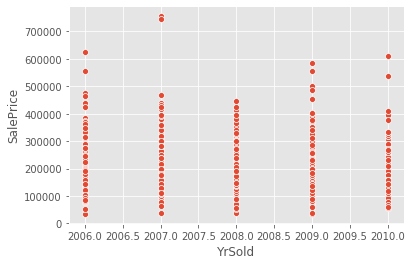

In [332]:
#Doesn't seem like predictor 
sns.scatterplot(df['YrSold'], df['SalePrice'])

In [7]:
df["LotArea"]

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [39]:
#Cleaning Data For Models 
df1 = pd.read_csv("final_data.csv")
df1 = df1.loc[:,("PavedDrive"):]
df1['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [36]:
#Corr Map
cor_map = df1.corr()
cor_map.style.background_gradient(cmap='coolwarm', axis = None)

In [45]:
response_var = df1[['SalePrice']]
feats = df1.drop('SalePrice', axis =1)

In [65]:
from sklearn import metrics, linear_model
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

In [49]:
np.random.seed(1)
Xtrain, Xtest, ytrain, ytest = train_test_split(feats, response_var)

# Fitting Ordinary Linear Regression

In [52]:
#Fitting Ordinary Linear Regression 
ols = LinearRegression()
ols.fit(Xtrain, ytrain)

print("R-squared:", ols.score(Xtrain, ytrain))
print("Intercept:", ols.intercept_)
print("Coefficients:", ols.coef_)

R-squared: 0.9088524945678501
Intercept: [13.59534094]
Coefficients: [[ 0.0076192   0.04901972  0.05796014  0.04371766 -0.00080348  0.02315635
   0.05343396  0.08011187  0.13010931  0.02906729  0.01844749  0.00824447
  -0.00134272  0.04084435  0.05659027 -0.08609342 -0.14495552  0.01254774
   0.00883358  0.38230053  0.05568635  0.04287959  0.00314995  0.00398002
   0.0531044   0.00059225 -0.00379606 -0.05551647  0.05986129  0.01413113
   0.06521756 -0.00300713  0.00851376 -0.02099241 -0.03129841  0.03975391
   0.06554787  0.10178416  0.06413138  0.0835567  -0.05137103  0.08324216
   0.0607952   0.06573627 -0.28738681  0.04573428 -0.03277643 -0.10572022
  -0.00869667  0.04443051  0.0681304  -0.02793076 -0.08008504  0.0276989
   0.05959482 -0.02035319  0.09255461 -0.11096073 -0.06485592 -0.0619793
  -0.15458483 -0.05198145 -0.04331771  0.02975904 -0.04890977  0.07347022
   0.12088478 -0.10491375 -0.03521907 -0.05656262 -0.0361914   0.02680653
   0.17720222 -0.00615879  0.05281171 -0.0568

In [60]:
predictions_train = ols.predict(X_train)
predictions_test = ols.predict(X_test)
predictions_train
#predictions_test

array([[14.27149181],
       [14.2074963 ],
       [17.43913921],
       ...,
       [13.05206273],
       [11.69404273],
       [11.67976922]])

# 5-fold cross-validation on the training set

In [62]:
#5-fold cross-validation on the training set
cv_scores = cross_val_score(ols, Xtrain, ytrain, cv=5)

print('Training Score:', ols.score(Xtrain, ytrain))
print('Cross validation scores:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', ols.score(Xtest, ytest))

Training Score: 0.9088524945678501
Cross validation scores: [0.8565146  0.88297651 0.86749204 0.87461248 0.90709411]
Mean cross validation score: 0.8777379488100363
Test Score: 0.8891936059425338


In [63]:
# Shuffled 5-fold cross validation scores are rather similar
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores_shuffled = cross_val_score(ols, Xtrain, ytrain, cv=kf)

print('Shuffled cross validation score:', cv_scores_shuffled)
print('Mean shuffled cross validation score:', cv_scores_shuffled.mean())

Shuffled cross validation score: [0.8725918  0.87051083 0.88644814 0.86125421 0.91404423]
Mean shuffled cross validation score: 0.8809698420947353


In [67]:
print('Mean Squared Error:', metrics.mean_squared_error(ytest, predictions_test)) #Not Good
print('Root Mean Squared Error:', (metrics.mean_squared_error(ytest, predictions_test))**0.5) #Not Good

Mean Squared Error: 3.229096606326619
Root Mean Squared Error: 1.7969687271420778


# Ridge & Lasso

In [70]:
# Ridge Cross-Validation
ridge_mod = RidgeCV(alphas=(-4, 4, 10), cv=5)
ridge_mod.fit(Xtrain, ytrain)

print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(Xtrain, ytrain))
print("Test Score:", ridge_mod.score(Xtest, ytest))

Best Ridge alpha: 4
Training score: 0.9038818764685068
Test Score: 0.8921243348461138


In [80]:
# With Alpha Score from Above// Similar 
ridge_mod = Ridge(alpha=4)

scores = cross_val_score(ridge_mod, Xtrain, ytrain, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(Xtrain, ytrain)
print("Training Score:", ridge_mod.score(Xtrain, ytrain))
print("Test Score:", ridge_mod.score(Xtest, ytest))

Cross-validated training scores: [0.85143552 0.88654264 0.8698359  0.87229877 0.91559592]
Mean cross-validated training score: 0.8791417488878241
Training Score: 0.9038818764685068
Test Score: 0.8921243348461138


In [81]:
ridge_predictions = ridge_mod.predict(Xtest)
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ridge_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(ytest, ridge_predictions))**0.5)


Mean Squared Error: 0.018079929639102106
Root Mean Squared Error: 0.1344616288727089


In [82]:
# Lasso Cross-Validation
lasso_mod = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
lasso_mod.fit(Xtrain, ytrain)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(Xtrain, ytrain))
print("Test Score:", lasso_mod.score(Xtest, ytest))

Best Lasso alpha: 0.000774263682681127
Training score: 0.8958530931534024
Test Score: 0.8950991106894187


C:\Users\juanr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
lasso_predictions = lasso_mod.predict(Xtest)
print('Mean Squared Error:', metrics.mean_squared_error(ytest, lasso_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(ytest, lasso_predictions))**0.5)

Mean Squared Error: 0.017581358085802006
Root Mean Squared Error: 0.13259471364199255
